In [1]:
################### IMPORTS ####################################
import numpy as np
import matplotlib.pyplot as plt
import pylab
import math


In [2]:
################# DECLARE GLOBAL VARIABLES ###################

# convert 10**30 kg (normal black hole mass) to natural numbers
m_one = 10**30 * 9.109 * 10**(-31)
m_two = 10**30 * 9.109 * 10**(-31)

#Setting the speed of light and garvitational constant
#to 1 as they are natural units
c = 1
g = 1
M = m_one + m_two

#What we set these 2 to is not really important
t = 100
psi = 100

nu = (m_one * m_two) / M**2
alpha = []
alpha.append(1)
alpha.append(0)
SNR = 10

epsilon = 0.1
q = m_two/m_one

# modify the variables in params to whichever ones you want to be taken into
# account for the fishermatrix (from the waveform) If a parameter is taken out
# the first line of the wavefunction has to be adjusted to not unpack that
# nonexistent parameter
params = [0, 0, 0, 0]

In [3]:
###################### FUNCTIONS #######################
''' These are our wavefunctions, depending on which one you want to use you input
a different function_index'''

def phi_f(f, params, function_index):
    try:
        if function_index == 1:
            return phi_f1(f, params)
        elif function_index == 2:
            return phi_f2(f, params)
        else:
            return cause_an_error
    except:
        print("this wavefunction doesn't exist")

'''This wavefunction is used for part 1,2 and 3 of the exercise'''
def phi_f1(f, params):
    psi, t, M, nu = params
    v = (np.pi * M * f)**(-1 / 3)
    sum_k = 0
    for k in range(len(alpha)):
        sum_k += alpha[k] * v**k
    return 2 * np.pi * f * t - psi - np.pi / 4 + 3 / (128 * nu * v**5) * sum_k

'''This wavefunction was used for part 4 of the exercise as it takes into
account the resonance frequency and the phase shift of the blackhole, and instead
of phi, uses epsilon as a parameter'''
def phi_f2(f, params):
    epsilon, t, M, nu = params
    f = get_resonance_freq()
    v = (np.pi * M * f)**(-1 / 3)
    sum_k = 0
    for k in range(len(alpha)):
        sum_k += alpha[k] * v**k
    return 2 * np.pi * f * t - get_phase_shift(epsilon) - np.pi / 4 + 3 / (128 * nu * v**5) * sum_k

'''You can add your own wavefunction'''
def phi_f3(f, params):
    pass  # here you can add another wave function if wanted

''' Get k1 variable using epsilon'''
def get_k1(epsilon):
    return (8/(5*(7+3*math.log(epsilon))))

'''calculating the phase shift of the gravitational wave'''
def get_phase_shift(epsilon):
    return ((25*np.pi*0.1**2)/(6144/2))*(np.abs(get_k1(epsilon))/(q*(1+q)))

'''get resonance frequency of the black hole'''
def get_resonance_freq():
    return ((c**3)/(m_one*g))*(1/np.abs(math.log(epsilon)))

# first find A (integral from low to high f^-7/6)/S(f)df
''' Finds A via intergation '''
def get_A(freq_list, pds, SNR):
    integral = 0
    for f, s_h in zip(freq_list, pds):
        integral += (f)**(-7 / 6) / s_h
    return SNR / np.sqrt(abs(integral))


''' Calculates h(f)'''
def get_h_f(A, f, params, function_index):
    phi = phi_f(f, params, function_index)
    h_f = A * f**(-7 / 6) * np.exp(1j * phi)
    return h_f


'''load Einstein Telescope data'''
def load_einstein():
    try:
        file = open('EinsteinPDS')
    except:
        print("Please move the 'LigoPDS' file into the folder from which you are running this programme")
    string_read = file.read()
    arr = list(map(float, string_read.split()))
    x_arr = []
    y_arr1 = []
    y_arr2 = []
    y_arr3 = []
    for i in range(len(arr)):
        if i % 4 == 0:
            x_arr.append(arr[i])
        if i % 4 == 1:
            y_arr1.append(arr[i])
        if i % 4 == 2:
            y_arr2.append(arr[i])
        if i % 4 == 3:
            y_arr3.append(arr[i])
    plt.plot(x_arr, y_arr1)
    plt.plot(x_arr, y_arr2)
    plt.plot(x_arr, y_arr3)
    plt.yscale('log')
    plt.xscale('log')
    return x_arr, y_arr3


'''load Advanced Ligo data'''
def load_adv_ligo():
    try:
        file = open('LigoPDS')
    except:
        print("Please move the 'LigoPDS' file into the folder from which you are running this programme")
    string_read = file.read()
    arr = list(map(float, string_read.split()))
    x_arr = []
    y_arr1 = []
    y_arr2 = []
    y_arr3 = []
    y_arr4 = []
    y_arr5 = []
    y_arr6 = []
    for i in range(len(arr)):
        if i % 7 == 0:
            x_arr.append(arr[i])
        if i % 7 == 1:
            y_arr1.append(arr[i])
        if i % 7 == 2:
            y_arr2.append(arr[i])
        if i % 7 == 3:
            y_arr3.append(arr[i])
        if i % 7 == 4:
            y_arr4.append(arr[i])
        if i % 7 == 5:
            y_arr5.append(arr[i])
        if i % 7 == 6:
            y_arr6.append(arr[i])
    plt.plot(x_arr, y_arr1)
    plt.plot(x_arr, y_arr2)
    plt.plot(x_arr, y_arr3)
    plt.plot(x_arr, y_arr4)
    plt.plot(x_arr, y_arr5)
    plt.plot(x_arr, y_arr6)
    plt.yscale('log')
    plt.xscale('log')
    return x_arr, y_arr6


''' Calculates S(h) for initial LIGO'''
def s_h_ligo(f):
    S_0 = 9 * 10**(-46)
    f_s = 40
    f_0 = 150
    x = f / f_0
    if(f >= f_s):
        r = S_0 * (((4.49 * x)**(-56)) + 0.16 *
                   (x**(-4.52)) + 0.52 + (0.32 * (x**2)))
    else:
        r = 10000000  # if infinity leads to numerical errors
    return(r)

''' Calculates S(h) for advanced LIGO'''
def s_h_adv_ligo(f):
    f_0 = 215
    f_s = 20
    S_0 = 6 * 10**(-49)
    x = f / f_0
    if (f >= f_s):
        r = S_0 * (x**(-4.14) - 5 * x**(-2) +
                   ((111 * (1 - x**2 + (x**4) / 2) / (1 + (x**2) / 2))))
    else:
        r = 10000000  # if infinity leads to numerical errors
    return(r)


''' Finds derivative h'(f)'''
def get_h_f_derivative(A, f, i, function_index):
    delta_x = params[i] / 10
    new_params = params.copy()
    new_params[i] = new_params[i] + params[i] / 10
    delta_y = get_h_f(A, f, new_params, function_index) - get_h_f(A, f, params, function_index)
    return delta_y / delta_x


''' Creates matrix using previous functions'''
def create_fisher_matrix(A, freq_list, pds, function_index):
    fisher_matrix = []
    for i in range(len(params)):
        fisher_matrix.append([])
        for j in range(len(params)):
            integral = 0
            for f, sh in zip(freq_list, pds):
                integral += np.real(get_h_f_derivative(A, f, i, function_index)
                                    * get_h_f_derivative(A, f, j, function_index) / sh)
            # print(integral)
            fisher_matrix[-1].append(integral)
    return(fisher_matrix)
'''This function can plot both the PDS of initial and advanced LIGO'''
def graph_s_h(telescope):
    graph_array = []
    try:
        if telescope == 'ligo':
            for i in range(0, 1000):
                graph_array.append(np.sqrt(s_h_ligo(i)))
        elif telescope == 'adv_ligo':
            for i in range(0, 1000):
                graph_array.append(np.sqrt(s_h_adv_ligo(i)))
        plt.figure()
        plt.plot(graph_array)
        plt.yscale('log')
        plt.xscale('log')
        axes = plt.gca()
        axes.set_ylim([10**(-24), 10**(-21)])
        axes.set_xlim([10**1, 10**3])
    except:
        print("no analytical solve for this telescope known")

" As you can see here the PDS of the Einstein telescope is smaller across the\nboard, indicating that it is capable of detecting much smaller signals. It is\nalso notable that the x-axis doesn't have the same range, where ligo already\nsignificantly worsens around f<10^2 the Einstein telescope keeps up until\nf<10^1"

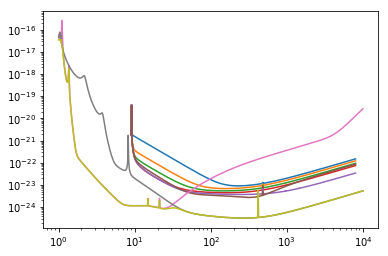

In [4]:
############################## MAIN #######################################
# Comment colour coding in the main part:
'''green = physics'''
#  grey = programming

# first, read in the pds of advanced ligo/the Einstein telescope
freq_list, pds = load_adv_ligo()
freq_list_einstein, pds_einstein = load_einstein()

''' As you can see here the PDS of the Einstein telescope is smaller across the
board, indicating that it is capable of detecting much smaller signals. It is
also notable that the x-axis doesn't have the same range, where ligo already
significantly worsens around f<10^2 the Einstein telescope keeps up until
f<10^1'''


In [5]:
'''We will now begin to compute the fisher matrix'''
# firstly, the parameter list is set
params = [psi, t, M, nu]
# now, a is set via integration
A = get_A(freq_list, pds, SNR)
A_einstein = get_A(freq_list_einstein, pds, SNR)

print('A of LIGO: ', A)
print('A of Einstein Telescope: ', A_einstein)


matrix = create_fisher_matrix(A, freq_list, pds, 1)

matrix_einstein = create_fisher_matrix(A, freq_list_einstein, pds_einstein, 1)

# invert fisher_matrix
inverse = np.linalg.inv(matrix)
inverse_einstein = np.linalg.inv(matrix_einstein)

# extract diagonal and square root
diag = np.abs(np.diagonal(inverse))
diag_einstein = np.abs(np.diagonal(inverse_einstein))
print('diagonal of LIGO fishermatrix: ', diag)
print('diagonal of Einstein Telescope fishermatrix: ', diag_einstein)
std = np.sqrt(diag)
std_einstein = np.sqrt(diag_einstein)

# Print standard deviation and standard deviation/value
print('Standard deviation of LIGO: ',std)
print('Standard deviation of Einstein Telescope: ', std_einstein)

# Params are in the following order: psi, t, M, nu
print('Print values of parameters: ', params)
print('Percent of LIGO: ', np.divide(std, params))
print('Percent of Einstein Telescope: ', np.divide(std_einstein, params))

A of LIGO:  6.924246607893725e-12
A of Einstein Telescope:  2.720189059939407e-12
diagonal of LIGO fishermatrix:  [5.26706941e+03 5.03515933e+03 1.69215211e+00 9.23865802e-03]
diagonal of Einstein Telescope fishermatrix:  [5.00212737e+00 4.40748357e+00 8.49033344e-03 1.12689196e-05]
Standard deviation of LIGO:  [72.57457827 70.95885657  1.30082747  0.09611794]
Standard deviation of Einstein Telescope:  [2.23654362 2.09940076 0.09214301 0.00335692]
Print values of parameters:  [100, 100, 1.8218000000000003, 0.25]
Percent of LIGO:  [0.72574578 0.70958857 0.71403418 0.38447175]
Percent of Einstein Telescope:  [0.02236544 0.02099401 0.050578   0.01342768]


In [6]:
'''Now we will look at the quantum black hole. Here we will do the same steps
but we will now use the second wavefunction instead and with epsilon '''

params = [epsilon, t, M, nu]
# now, a is set via integration
A = get_A(freq_list, pds, SNR)
A_einstein = get_A(freq_list_einstein, pds, SNR)

print('A of LIGO: ', A)
print('A of Einstein Telescope: ', A_einstein)

matrix = create_fisher_matrix(A, freq_list, pds, 1)

matrix_einstein = create_fisher_matrix(A, freq_list_einstein, pds_einstein, 1)

# invert fisher_matrix
inverse = np.linalg.inv(matrix)
inverse_einstein = np.linalg.inv(matrix_einstein)

# extract diagonal and square root
diag = np.abs(np.diagonal(inverse))
diag_einstein = np.abs(np.diagonal(inverse_einstein))
print('diagonal of LIGO fishermatrix: ', diag)
print('diagonal of Einstein Telescope fishermatrix: ', diag_einstein)
std = np.sqrt(diag)
std_einstein = np.sqrt(diag_einstein)

# Print standard deviation and standard deviation/value
print('Standard deviation of LIGO: ',std)
print('Standard deviation of Einstein Telescope: ', std_einstein)

# Params are in the following order: epsilon, t, M, nu
print('Print values of parameters: ', params)
print('Percent of LIGO: ', np.divide(std, params))
print('Percent of Einstein Telescope: ', np.divide(std_einstein, params))

'''As clearly visible, the standard deviation of the einstein telescope is almost
3 orders of magnitude smaller. This shows that there is a very clear improvement in
the measurement capabilities, not only in terms of what the smallest signal that
can be detected is but also in terms of how accurate those detections are'''


A of LIGO:  6.924246607893725e-12
A of Einstein Telescope:  2.720189059939407e-12
diagonal of LIGO fishermatrix:  [7.74967874e+00 3.64223796e+02 4.72614096e-01 3.38861658e-04]
diagonal of Einstein Telescope fishermatrix:  [7.54928519e-02 8.47659952e+00 1.04971351e-03 4.30643550e-05]
Standard deviation of LIGO:  [2.78382448e+00 1.90846482e+01 6.87469342e-01 1.84081954e-02]
Standard deviation of Einstein Telescope:  [0.27475963 2.91146003 0.03239928 0.00656234]
Print values of parameters:  [0.1, 100, 1.8218000000000003, 0.25]
Percent of LIGO:  [27.83824481  0.19084648  0.3773572   0.07363278]
Percent of Einstein Telescope:  [2.74759626 0.0291146  0.01778421 0.02624937]


'As clearly visible, the standard deviation of the einstein telescope is almost\n3 orders of magnitude smaller. This shows that there is a very clear improvement in\nthe measurement capabilities, not only in terms of what the smallest signal that\ncan be detected is but also in terms of how accurate those detections are'

In [7]:

### This section will run for quite a while since the fisher matrix has
### to be computed many times. It returns the epsilon standard deviation
### depending on epsilon itself and the mass ratio (q)

params = [epsilon, t, M, nu]

A_einstein = get_A(freq_list_einstein, pds, SNR)

m_one = 1.4*(1.988*10**30 * 9.109 * 10**(-31)) #Setting mass 1 to be 1.4 solar masses
color_plot = []


for i in range(0,11):
    m_two = ((i+1)*10)*(1.988*10**30 * 9.109 * 10**(-31))
    for j in range(0,11):
        epsilon = (j*10+1650)/100000
        matrix_einstein = create_fisher_matrix(A_einstein, freq_list_einstein, pds_einstein, 2)
        inverse_einstein = np.linalg.inv(matrix_einstein)
        diag_einstein = np.abs(np.diagonal(inverse_einstein))
        std_einstein = np.sqrt(diag_einstein)
        color_plot.append(std_einstein[0])
    print("loop ran")


loop ran
loop ran
loop ran
loop ran
loop ran
loop ran
loop ran
loop ran
loop ran
loop ran
loop ran


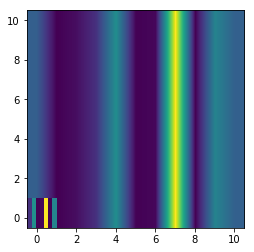

In [8]:
'''Here we plot the results of the previous section. This results in a plot that
has x/y axis representing epsilon/mass ratio and the colour corresponds to the
standard deviation of epsilon. Bright = higher in this case'''
x = np.linspace(-1, 1, 11)
y = np.linspace(-1, 1, 11)

X, Y = np.meshgrid(x, y)
Z = np.array(color_plot).reshape(11,11)
plt.pcolor(X, Y, Z)
plt.imshow(Z, origin='lower',interpolation='bilinear')



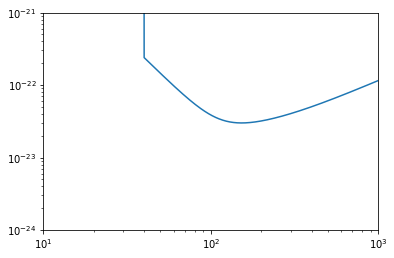

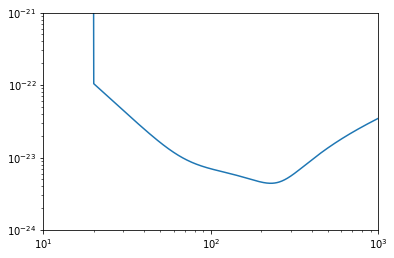

In [9]:
'''The following section plots Figure 1 of the paper for the initial ligo and
advanced ligo
based on the analytical formula (formula 3.7 and 3.8) given in the arxiv paper as a proof of concept.
This is to prove that our s_h function is actually working and the units used
within it are correct'''


graph_s_h('ligo')
graph_s_h('adv_ligo')